In [1]:
! pip install tensorflow --upgrade

In [2]:
import sys
import os
import sklearn
import tensorflow as tf

In [3]:
import cv2
import pandas as pd
import numpy as np

In [4]:
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import pyplot as plt

In [9]:
tf.__version__

'2.17.0'

In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [12]:
plt

<module 'matplotlib.pyplot' from 'C:\\Program Files\\Drag Software\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [13]:
def get_data():
    return pd.read_csv(r"C:\Users\101ri\OneDrive\Desktop\New DeepFake\metadata.csv")

In [14]:
meta=get_data()
meta.head()

videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4

In [15]:
meta=get_data()
meta.head()

videoname  original_width  original_height label        original
0  aznyksihgl.mp4             129              129  FAKE  xnojggkrxt.mp4
1  gkwmalrvcj.mp4             129              129  FAKE  hqqmtxvbjj.mp4
2  lxnqzocgaq.mp4             223              217  FAKE  xjzkfqddyk.mp4
3  itsbtrrelv.mp4             186              186  FAKE  kqvepwqxfe.mp4
4  ddvgrczjno.mp4             155              155  FAKE  pluadmqqta.mp4

In [16]:
len(meta[meta.label=='FAKE']),len(meta[meta.label=='REAL'])

(79341, 16293)

In [17]:
real_df = meta[meta["label"] == "REAL"]
fake_df = meta[meta["label"] == "FAKE"]

In [18]:
sample_size = 8000

In [19]:
real_df = real_df.sample(sample_size, random_state=42)
fake_df = fake_df.sample(sample_size, random_state=42)

sample_meta = pd.concat([real_df, fake_df])

In [20]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=42,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=42,stratify=Train_set['label'])

In [21]:
Train_set.shape,Val_set.shape,Test_set.shape

((8960, 5), (3840, 5), (3200, 5))

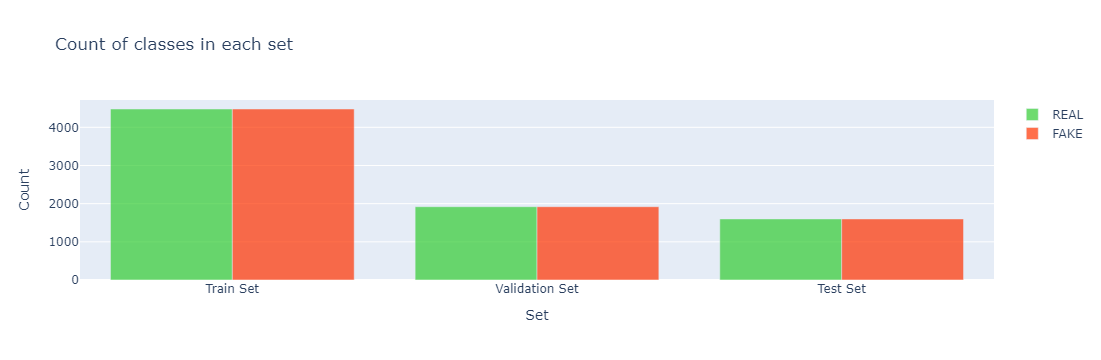

In [22]:
y = dict()

y[0] = []
y[1] = []

for set_name in (np.array(Train_set['label']), np.array(Val_set['label']), np.array(Test_set['label'])):
    y[0].append(np.sum(set_name == 'REAL'))
    y[1].append(np.sum(set_name == 'FAKE'))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='REAL',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='FAKE',
    marker=dict(color='#ff3300'),
    opacity=0.7
)

data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)

fig = go.Figure(data, layout)
iplot(fig)

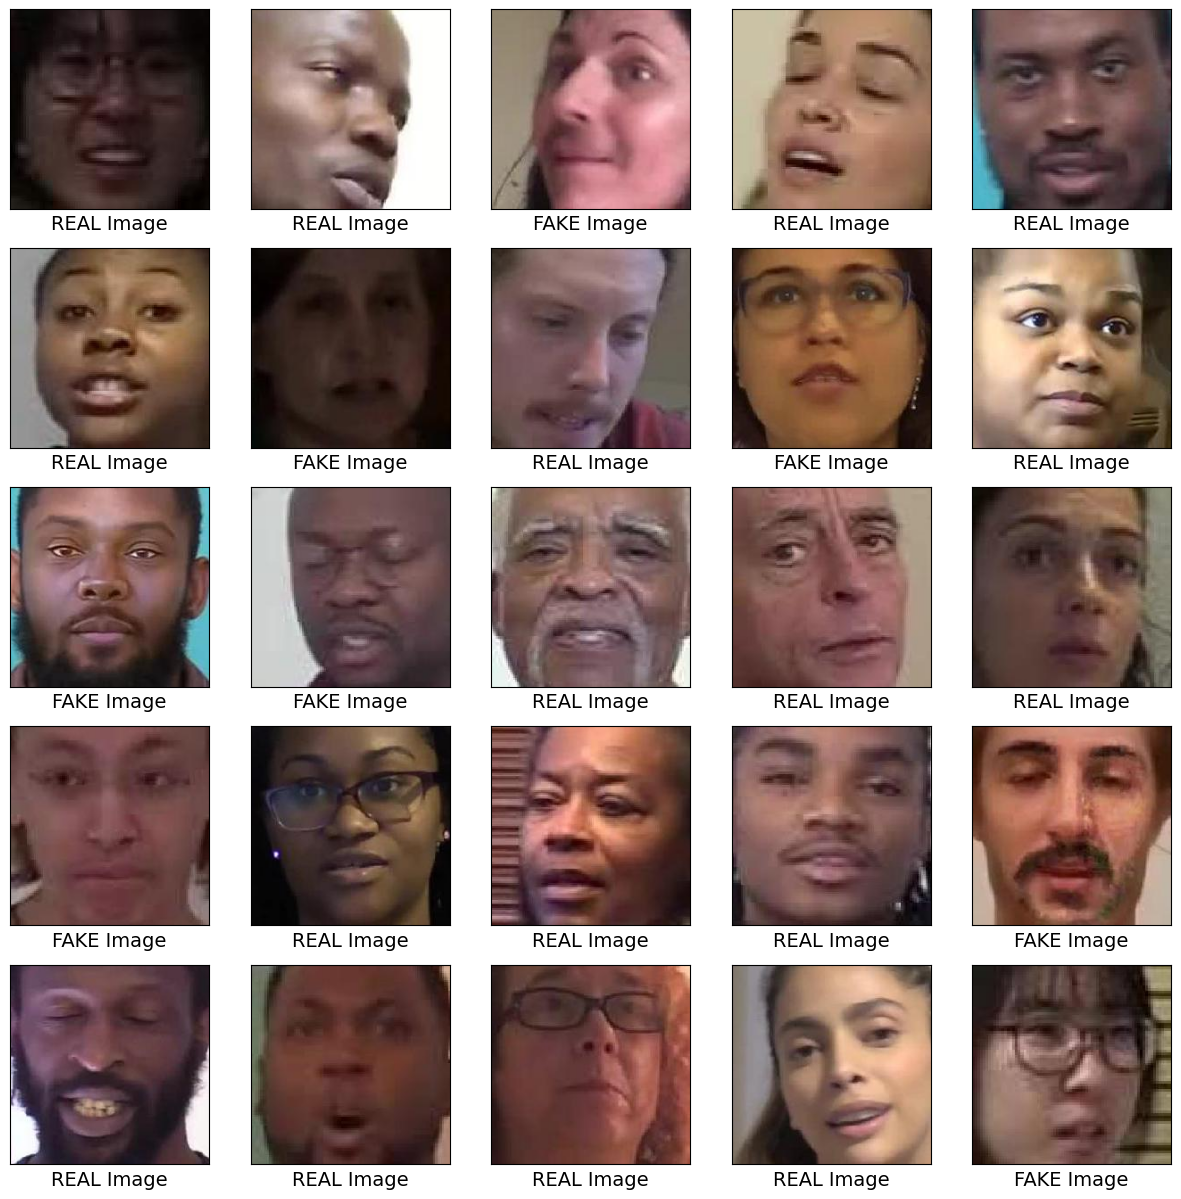

In [30]:


plt.figure(figsize=(15,15))
for cur, i in enumerate(Train_set.index[25:50]):
    plt.subplot(5, 5, cur + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Update the file path to your local directory
    image_path = 'C:/Users/101ri/OneDrive/Desktop/New DeepFake/faces_224/' + Train_set.loc[i, 'videoname'][:-4] + '.jpg'
    img = cv2.imread(image_path)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display in matplotlib
    
    if Train_set.loc[i, 'label'] == 'FAKE':
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')
        
plt.show()


In [35]:
def retrieve_dataset(set_name):
    images, labels = [], []
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        # Update the file path to your local directory
        image_path = r'C:/Users/101ri/OneDrive/Desktop/New DeepFake/faces_224/' + img[:-4] + '.jpg'
        images.append(cv2.imread(image_path))
        
        if imclass == 'FAKE':
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(images), np.array(labels)

In [39]:
X_train,y_train=retreive_dataset(Train_set)
X_val,y_val=retreive_dataset(Val_set)
X_test,y_test=retreive_dataset(Test_set)

NameError: name 'retreive_dataset' is not defined

In [38]:
import cv2
import numpy as np

def retrieve_dataset(set_name):
    images, labels = [], []
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        # Construct the full image path
        image_path = 'C:/Users/101ri/OneDrive/Desktop/New DeepFake/faces_224/' + img[:-4] + '.jpg'
        
        # Read the image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded correctly
        if image is None:
            print(f"Warning: Image {image_path} could not be loaded.")
            continue
        
        images.append(image)
        
        # Convert labels to binary (1 for FAKE, 0 for REAL)
        if imclass == 'FAKE':
            labels.append(1)
        else:
            labels.append(0)
    
    # Check if any images were loaded
    if len(images) == 0 or len(labels) == 0:
        print("Error: No images or labels were loaded. Check the file paths and dataset.")
    
    return np.array(images), np.array(labels)

# Assuming Train_set, Val_set, and Test_set are correctly loaded DataFrames
try:
    X_train, y_train = retrieve_dataset(Train_set)
    X_val, y_val = retrieve_dataset(Val_set)
    X_test, y_test = retrieve_dataset(Test_set)
except ValueError as e:
    print("Error during dataset retrieval:", e)


In [40]:
X_train

array([[[[ 16,  20,  14],
         [ 17,  21,  15],
         [ 17,  21,  15],
         ...,
         [  6,   5,   7],
         [  6,   5,   7],
         [  7,   6,   8]],

        [[ 17,  21,  15],
         [ 17,  21,  15],
         [ 17,  21,  15],
         ...,
         [  5,   4,   6],
         [  6,   5,   7],
         [  6,   5,   7]],

        [[ 18,  22,  17],
         [ 17,  21,  16],
         [ 17,  21,  16],
         ...,
         [  2,   4,   5],
         [  3,   5,   6],
         [  3,   5,   6]],

        ...,

        [[ 12,  24,  24],
         [ 12,  24,  24],
         [ 12,  24,  24],
         ...,
         [  7,   9,  10],
         [  8,  10,  11],
         [  9,  11,  12]],

        [[ 12,  24,  24],
         [ 12,  24,  24],
         [ 12,  24,  24],
         ...,
         [  6,   8,   9],
         [  8,  10,  11],
         [  9,  11,  12]],

        [[ 12,  24,  24],
         [ 12,  24,  24],
         [ 13,  25,  25],
         ...,
         [  6,   8,   9],
        

In [41]:
X_val

array([[[[ 43,  49,  62],
         [ 51,  57,  70],
         [ 60,  65,  80],
         ...,
         [ 50,  52,  70],
         [ 50,  52,  70],
         [ 49,  51,  69]],

        [[ 51,  57,  70],
         [ 54,  60,  73],
         [ 55,  60,  75],
         ...,
         [ 49,  51,  69],
         [ 49,  51,  69],
         [ 48,  50,  68]],

        [[ 64,  70,  83],
         [ 62,  68,  81],
         [ 57,  62,  77],
         ...,
         [ 48,  50,  68],
         [ 48,  50,  68],
         [ 48,  50,  68]],

        ...,

        [[ 87,  83,  88],
         [ 85,  81,  86],
         [ 78,  72,  77],
         ...,
         [ 77,  73,  79],
         [ 62,  55,  62],
         [ 55,  48,  55]],

        [[ 84,  80,  85],
         [ 81,  77,  82],
         [ 74,  68,  73],
         ...,
         [ 81,  77,  83],
         [ 62,  55,  62],
         [ 56,  49,  56]],

        [[ 81,  77,  82],
         [ 80,  76,  81],
         [ 79,  73,  78],
         ...,
         [ 88,  84,  90],
        

In [43]:
tf.random.set_seed(42) 
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

C:\Program Files\Drag Software\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [42]:
from functools import partial

In [44]:
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 401408)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      51,380,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,619,585 (196.91 MB)

 Trainable params: 51,619,585 (196.91 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(X_train, y_train, epochs=5,batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1050s 7s/step - accuracy: 0.4994 - loss: 860.5663 - val_accuracy: 0.4992 - val_loss: 0.6932
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1043s 7s/step - accuracy: 0.4961 - loss: 0.6933 - val_accuracy: 0.4966 - val_loss: 0.6929
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1044s 7s/step - accuracy: 0.4945 - loss: 0.6969 - val_accuracy: 0.4969 - val_loss: 0.6925
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1043s 7s/step - accuracy: 0.4939 - loss: 0.6986 - val_accuracy: 0.5021 - val_loss: 0.6929
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 1046s 7s/step - accuracy: 0.5022 - loss: 0.6943 - val_accuracy: 0.4964 - val_loss: 0.6940


In [46]:
score = model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 712ms/step - accuracy: 0.4865 - loss: 0.6945


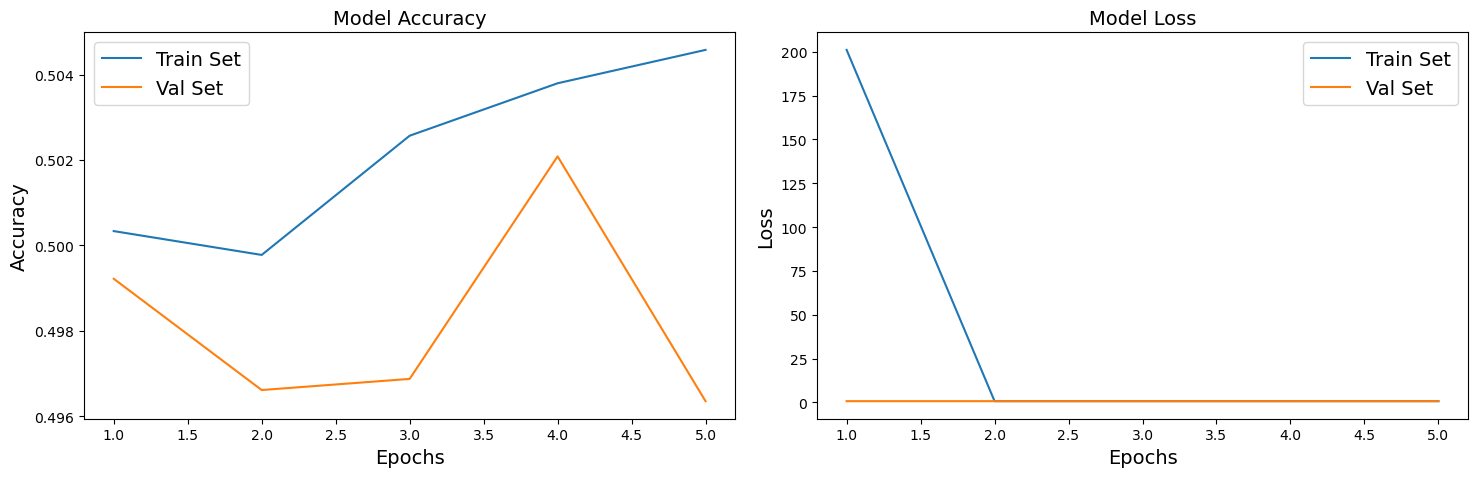

In [47]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

baseline score is almost 50% is good to go let's finetune some pretrained model

### Pretrained model for transfr learning

In [48]:
train_set_raw=tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_set_raw=tf.data.Dataset.from_tensor_slices((X_val,y_val))
test_set_raw=tf.data.Dataset.from_tensor_slices((X_test,y_test))


In [49]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.applications.xception.preprocess_input
train_set = train_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)

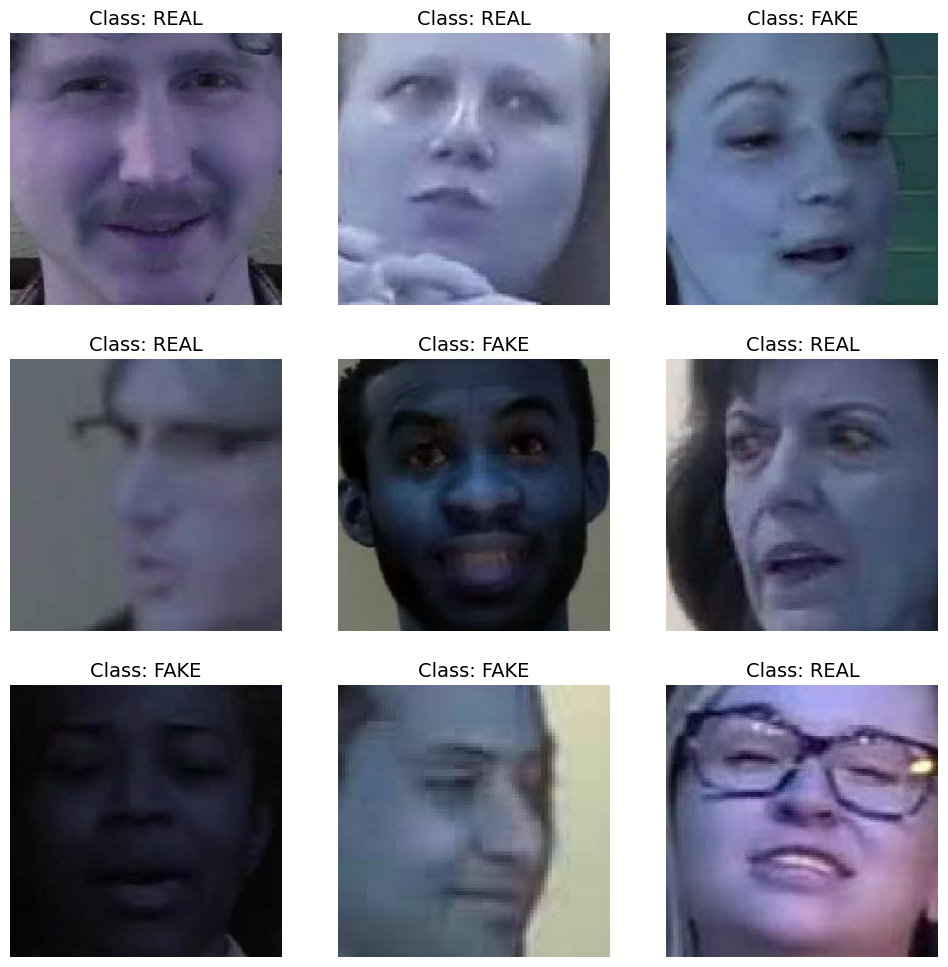

In [50]:
# extra code – displays the first 9 images in the first batch of valid_set

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow((X_batch[index] + 1) / 2)  # rescale to 0–1 for imshow()
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()

In [51]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

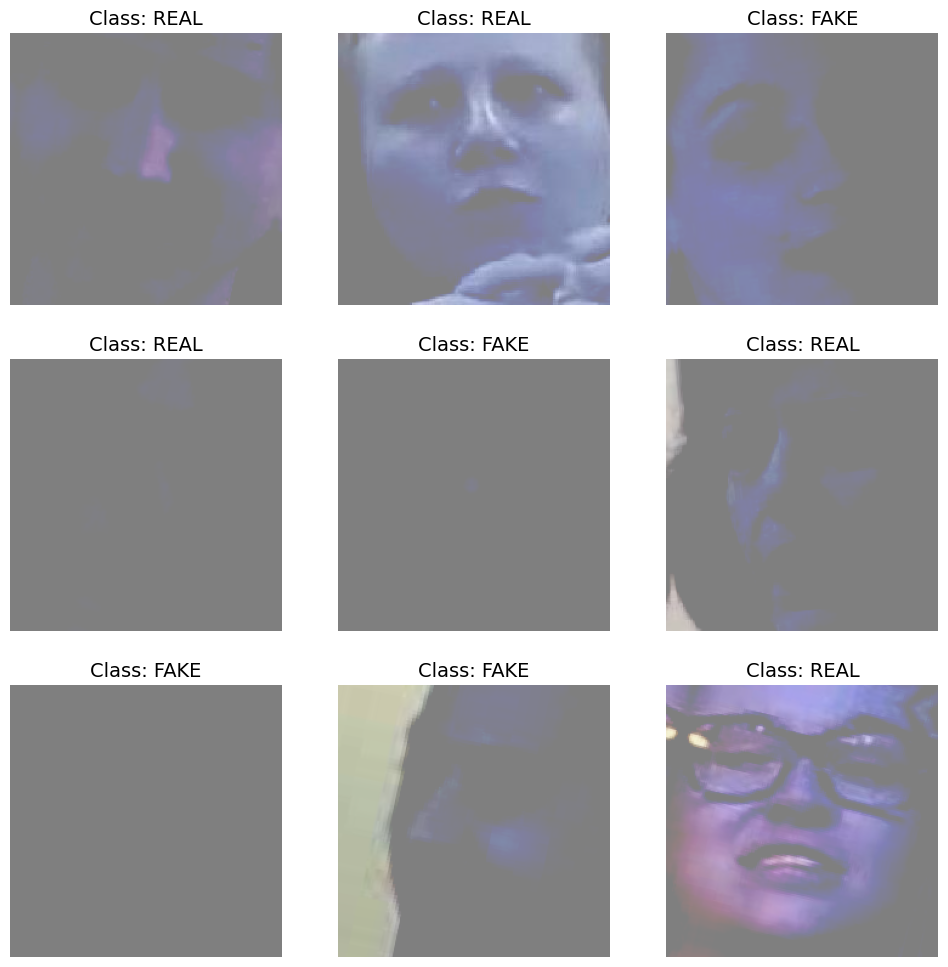

In [53]:
# extra code – displays the same first 9 images, after augmentation

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    X_batch_augmented = data_augmentation(X_batch, training=True)
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        # We must rescale the images to the 0-1 range for imshow(), and also
        # clip the result to that range, because data augmentation may
        # make some values go out of bounds (e.g., RandomContrast in this case).
        plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()

In [54]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 35s 0us/step


In [55]:
for layer in base_model.layers:
    layer.trainable = False

In [56]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=1)

280/280 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.5680 - loss: 0.9056 - val_accuracy: 0.5654 - val_loss: 1.4504


In [57]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_layer_1          33: block4_pool            66: block8_sepconv1_act    99: block11_sepconv2_act  
  1: block1_conv1           34: batch_normalization_2  67: block8_sepconv1       100: block11_sepconv2      
  2: block1_conv1_bn        35: add_2                  68: block8_sepconv1_bn    101: block11_sepconv2_bn   
  3: block1_conv1_act       36: block5_sepconv1_act    69: block8_sepconv2_act   102: block11_sepconv3_act  
  4: block1_conv2           37: block5_sepconv1        70: block8_sepconv2       103: block11_sepconv3      
  5: block1_conv2_bn        38: block5_sepconv1_bn     71: block8_sepconv2_bn    104: block11_sepconv3_bn   
  6: block1_conv2_act       39: block5_sepconv2_act    72: block8_sepconv3_act   105: add_9                 
  7: block2_sepconv1        40: block5_sepconv2        73: block8_sepconv3       106: block12_sepconv1_act  
  8: block2_sepconv1_bn     41: block5_sepconv2_bn     74: block8_sepconv3_bn    107: block12_sepconv1      
  9: block2_sepconv

In [58]:
model.evaluate(test_set)

100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5631 - loss: 1.4534


[1.5046783685684204, 0.5556250214576721]

In [61]:
for layer in base_model.layers[56:]:
    layer.trainable = True

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

# Train the model
history = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=2
)

Epoch 1/2
280/280 ━━━━━━━━━━━━━━━━━━━━ 1098s 4s/step - accuracy: 0.6437 - loss: 0.6531 - val_accuracy: 0.7242 - val_loss: 0.5793
Epoch 2/2
280/280 ━━━━━━━━━━━━━━━━━━━━ 1081s 4s/step - accuracy: 0.8671 - loss: 0.3177 - val_accuracy: 0.7688 - val_loss: 0.5258


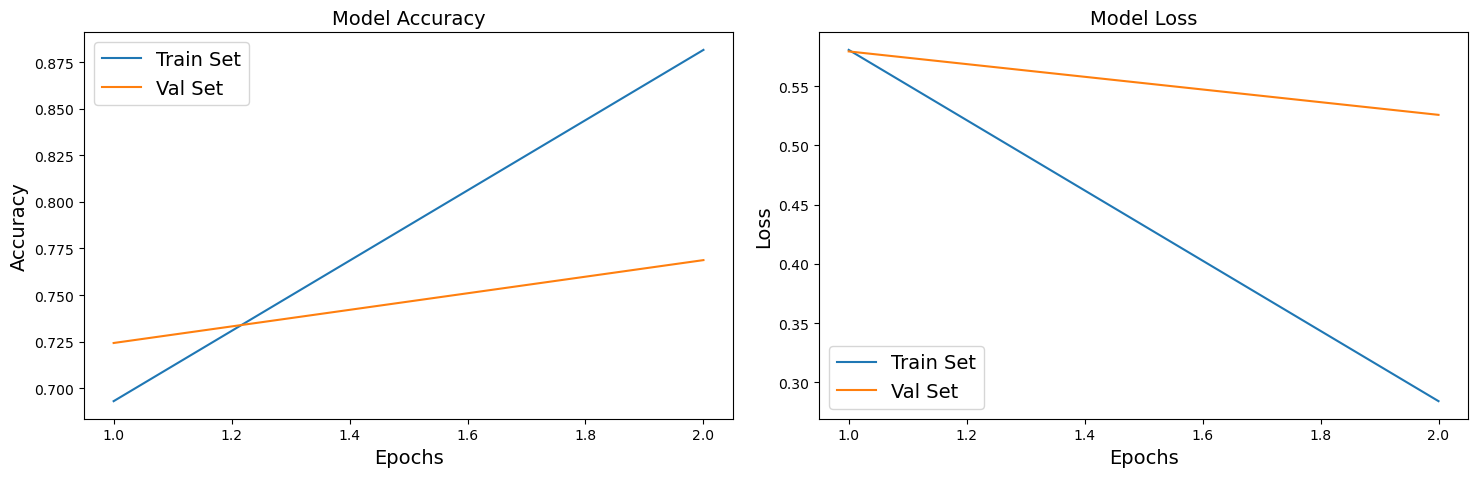

In [62]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [63]:
model.evaluate(test_set)

100/100 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7913 - loss: 0.4776


[0.4815945029258728, 0.7893750071525574]

In [64]:
model.save('xception_deepfake_image.h5')